In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## 1. Определить два вектора, представляющие собой число автомобилей, припаркованных в течении 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.

In [2]:
df = pd.DataFrame(
    data={'Улица': [80, 98, 75, 91, 78], 'Гараж': [100, 82, 105, 89, 102]},
    index=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница']
)
df

,Улица,Гараж
Понедельник,80,100
Вторник,98,82
Среда,75,105
Четверг,91,89
Пятница,78,102


In [3]:
print('Два вектора:\n', np.corrcoef(df['Улица'], df['Гараж']))

Два вектора:
 [[ 1. -1.]
 [-1.  1.]]


### 1.1. Найти и интерпретировать корреляцию между переменными «Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

In [4]:
print('Коэффициент корреляции по Пирсону: ', df['Улица'].corr(df['Гараж']))

Коэффициент корреляции по Пирсону:  -0.9999999999999998


### 1.2. Построить диаграмму рассеяния для вышеупомянутых переменных.

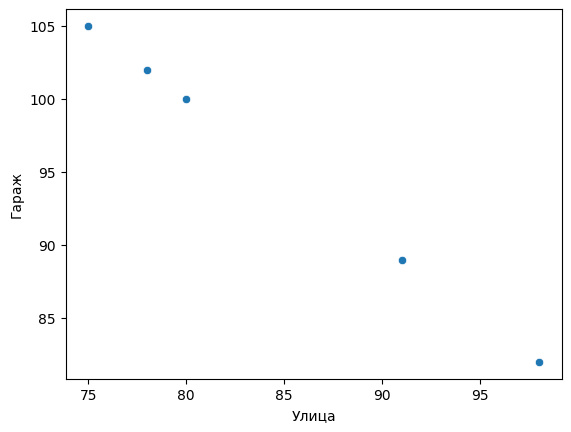

In [5]:
sns.scatterplot(data=df, x='Улица', y='Гараж');

## 2. Найти и выгрузить данные. Вывести, провести предобработку и описать признаки.

In [6]:
df = pd.read_csv('/bigdata/data/4/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Датасет содержит информацию о различных вариантах португальского красного вина "Винью Верде". Он описывает количество различных химических веществ, присутствующих в вине, и их влияние на его качество.

Описание признаков:

fixe acidity - фиксированная кислотность

volatile acidity - летучая кислотность

citric acid - лимонная кислота

residual sugar - остаточный сахар

chlorides - хлориды

free sulfur dioxide - свободный диоксид серы

total sulfur dioxide - всего диоксида серы

density - плотность

pH - водородный показатель

sulphates - сульфаты

alcohol - уровень алкоголя

**quality - качество (целевая переменная)** (в описании заявлено, что может изменяться от 0 до 10)

*Id - копия индексов - сразу отбросим*

In [7]:
df.drop(columns=['Id'], inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Как видно, пропущенные значение отсутствуют.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


Все числовые признаки приведены к соответствующим типам.

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Полезная информация про quality - изменяется от 3 до 8 (только целые числа).

### 2.1. Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте.

In [11]:
df.corr()[['quality']].sort_values(by='quality', ascending=False)

,quality
quality,1.000000
alcohol,0.484866
sulphates,0.257710
citric acid,0.240821
fixed acidity,0.121970
residual sugar,0.022002
pH,-0.052453
free sulfur dioxide,-0.063260
chlorides,-0.124085
density,-0.175208


По абсолютному значению больше всех коррелирует с зависимой переменной переменная **alcohol**. Дальше будем работать с ней.

### 2.2. Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.

In [12]:
feature = 'alcohol'

In [13]:
class MyGradientLinearRegression(object):
    def __init__(self):
        self.w1 = 0
        self.w0 = 0
        self.lr = 0.001
        self.n_iter = 10000
        self.eps = 0.0001
    
    def calc_mse(self, X, y):
        y_pred = self.w1 * X + self.w0
        return np.sum((y - y_pred) ** 2) / len(y)
    
    def calc_grad_mse(self, X, y):
        y_pred = self.w1 * X + self.w0
        return np.array([
            2 / len(X) * np.sum(y - y_pred) * (-1), # сдвиг
            2 / len(X) * np.sum((y - y_pred) * (-1) * X)  # наклон
        ])
    
    def fit(self, X, y, verbose=1, learning_rate=None, eps=None, n_iterations=None):
        X = X.values
        y = y.values
        if learning_rate:
            self.lr = learning_rate
        if eps:
            self.eps = eps
        if n_iterations:
            self.n_iter = n_iterations
        
        next_w1 = self.w1
        next_w0 = self.w0
        
        for i in range(1, self.n_iter+1):
            self.w1 = next_w1
            self.w0 = next_w0
            
            grad = self.calc_grad_mse(X, y)
            
            next_w0 = self.w0 - self.lr * grad[0]
            next_w1 = self.w1 - self.lr * grad[1]
            
            if (i % verbose) == 0 or i == 1:
                print(f"Итерация {i}")
                print(f"Текущая точка {self.w1, self.w0}. Следующая точка: {next_w1, next_w0}.")
                print(f"MSE: {self.calc_mse(X, y)}.")
                print("-----------------------------------------------")
            
            if (abs(self.w1 - next_w1) <= self.eps) and (abs(self.w0 - next_w0) <= self.eps):
                print(f'Ранний выход на итерации {i}, расстояния между коэффициентами меньше eps ({self.eps}).')
                print(f'Итоговая MSE: ', self.calc_mse(X, y))
                break
                
    def get_coefs(self):
        return {
            'bias': self.w1.copy(),
            'intercept': self.w0.copy()
        }    

In [14]:
linreg = MyGradientLinearRegression()
linreg.fit(df[feature], df.quality, verbose=5)

Итерация 1
Текущая точка (0, 0). Следующая точка: (0.11898786818314377, 0.01131408573928259).
MSE: 32.650918635170605.
-----------------------------------------------
Итерация 5
Текущая точка (0.3394051727593783, 0.03231743843005039). Следующая точка: (0.3829079125603301, 0.03647867604323269).
MSE: 4.825780793047217.
-----------------------------------------------
Итерация 10
Текущая точка (0.4793946614832363, 0.04577755344747298). Следующая точка: (0.49176042638004613, 0.046988299157685785).
MSE: 0.8791253321418792.
-----------------------------------------------
Итерация 15
Текущая точка (0.5191823621974792, 0.049742693673551754). Следующая точка: (0.5226954872416759, 0.0501145738966783).
MSE: 0.5600954049427329.
-----------------------------------------------
Итерация 20
Текущая точка (0.530481414631929, 0.05100827660162442). Следующая точка: (0.5314776212388679, 0.05114165373036293).
MSE: 0.5343000950180781.
-----------------------------------------------
Итерация 25
Текущая точка 

In [15]:
coefs = linreg.get_coefs()
coefs

{'bias': 0.5345773054309112, 'intercept': 0.051786141993295266}

### 2.3. Визуализировать регрессию на графике.

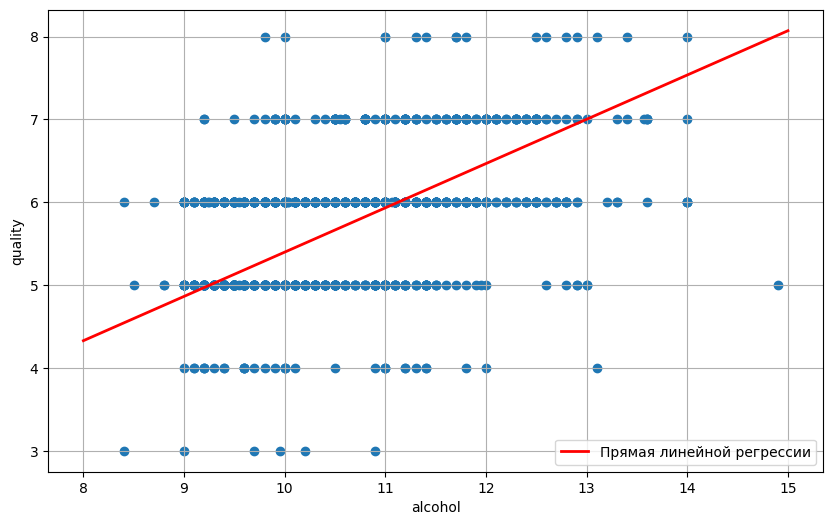

In [16]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(np.floor(df[feature].min()), np.ceil(df[feature].max()+1))

pred = coefs['bias'] * x + coefs['intercept']

plt.plot(x, pred, linewidth=2, color='r', label='Прямая линейной регрессии')
plt.scatter(df[feature], df.quality)
plt.xlabel(feature)
plt.grid()
plt.ylabel('quality')
plt.legend();

## 3. Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов.

In [17]:
data = pd.read_csv('/bigdata/data/4/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
print('Список уникальных регионов: ')
for i, region in enumerate(data.region.value_counts().index):
    print(f"{i+1}.", region)

Список уникальных регионов: 
1. southeast
2. southwest
3. northwest
4. northeast


### 3.1. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy.

In [21]:
southeast = data[data.region == 'southeast'].bmi.values
southwest = data[data.region == 'southwest'].bmi.values
northeast = data[data.region == 'northeast'].bmi.values
northwest = data[data.region == 'northwest'].bmi.values

In [22]:
stats.f_oneway(southeast, southwest, northeast, northwest)

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

P-value << 0.05, следовательно влияние региона на индекс массы тела статистически значимо.

### 3.2 Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.

In [23]:
model = ols('bmi ~ region', data=data).fit()
anova_res = sm.stats.anova_lm(model, typ=2)
anova_res

,sum_sq,df,F,PR(>F)
region,4055.880631,3.0,39.495057,1.881839e-24
Residual,45664.319755,1334.0,NaN,NaN


P-value снова намного меньше 0.05 (1.881839e-24), приходим к такому же выводу.

### 3.3 С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони. Сделать выводы.

In [24]:
groups = data.groupby('region').groups

p_value_init = 0.05
comb_list = list(combinations(groups, 2))
p_value_bonfer = p_value_init / len(comb_list)

print(f'Начальное p-value: {p_value_init}.')
print(f'Попарных сравнений будет произведено: {len(comb_list)}.')
print(f'P-value после поправки Бонферрони: {p_value_bonfer}.')
print()

for name1, name2 in comb_list:
    print(f'Сравнение {name1} с {name2}:')
    group1, group2 = data.iloc[groups[name1]].bmi.values, data.iloc[groups[name2]].bmi.values
    stat, pvalue = stats.ttest_ind(group1, group2)
    accept = False if pvalue <= p_value_bonfer else True
    print(f'P-value равен {pvalue}.  Различия индекса массы тела в регионах {name1} и {name2}', 
         'незначительны.' if accept else 'статистически значимы.')
    print()



Начальное p-value: 0.05.
Попарных сравнений будет произведено: 6.
P-value после поправки Бонферрони: 0.008333333333333333.

Сравнение northeast с northwest:
P-value равен 0.951929170821864.  Различия индекса массы тела в регионах northeast и northwest незначительны.

Сравнение northeast с southeast:
P-value равен 1.186014937424813e-17.  Различия индекса массы тела в регионах northeast и southeast статистически значимы.

Сравнение northeast с southwest:
P-value равен 0.0019086161671573074.  Различия индекса массы тела в регионах northeast и southwest статистически значимы.

Сравнение northwest с southeast:
P-value равен 2.643571405230106e-19.  Различия индекса массы тела в регионах northwest и southeast статистически значимы.

Сравнение northwest с southwest:
P-value равен 0.001076958496307695.  Различия индекса массы тела в регионах northwest и southwest статистически значимы.

Сравнение southeast с southwest:
P-value равен 5.4374009639680636e-09.  Различия индекса массы тела в региона

### 3.4. Выполнить пост-хок тесты Тьюки и построить график.

Пост-хок тест Тьюки плохо работает при сильных различиях в размере групп, так что сразу проверим этот момент.

In [25]:
for name, ids in groups.items():
    print(f'Размер группы {name} - {ids.size} элементов.')

Размер группы northeast - 324 элементов.
Размер группы northwest - 325 элементов.
Размер группы southeast - 364 элементов.
Размер группы southwest - 325 элементов.


Сразу видно, что размеры групп примерно совпадают.

In [26]:
tukey = pairwise_tukeyhsd(endog=data.bmi.values, groups=data.region.values, alpha=0.05)
print('Результаты: ')
display(tukey.summary())

Результаты: 


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,-0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,-0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


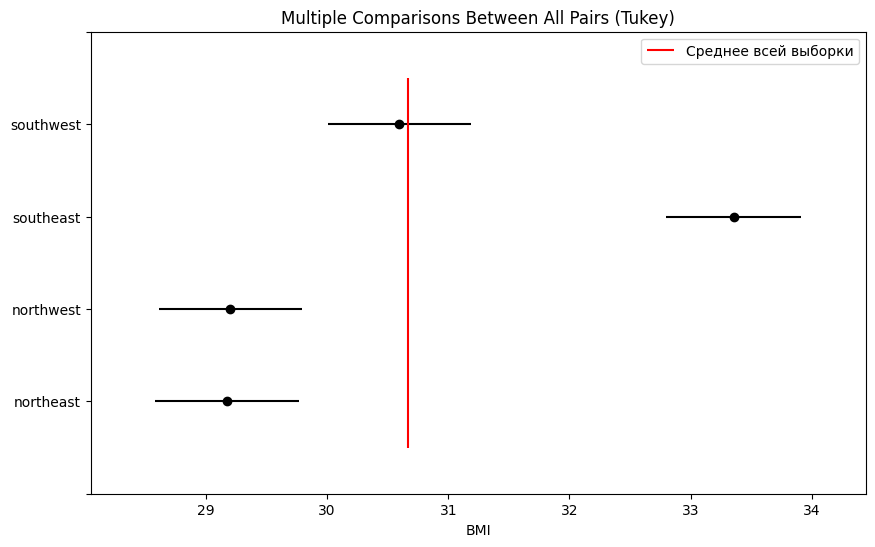

In [27]:
tukey.plot_simultaneous()
plt.vlines(x=data.bmi.mean(), color='red', ymin=-0.5, ymax=len(groups)-0.5, label='Среднее всей выборки')
plt.xlabel('BMI')
plt.legend();

### 3.5. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.

In [28]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region):C(sex),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


По результатам теста, регион оказывает значимое влияние на индекс массы тела, пол и взаимодействие региона с полом - нет.

### 3.6. Выполнить пост-хок тесты Тьюки и построить график.

In [29]:
data['combination'] = data.region + ' / ' + data.sex

In [30]:
tukey = pairwise_tukeyhsd(endog=data.bmi, groups=data.combination, alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2706,1.6711,False
northeast / female,northwest / female,-0.0464,1.0,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,1.0,-2.1811,1.7728,False
northeast / female,southeast / female,3.3469,0.0,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.0,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9497,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9999,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,1.0,-1.8752,2.0665,False
northeast / male,southeast / female,3.6467,0.0,1.7159,5.5775,True


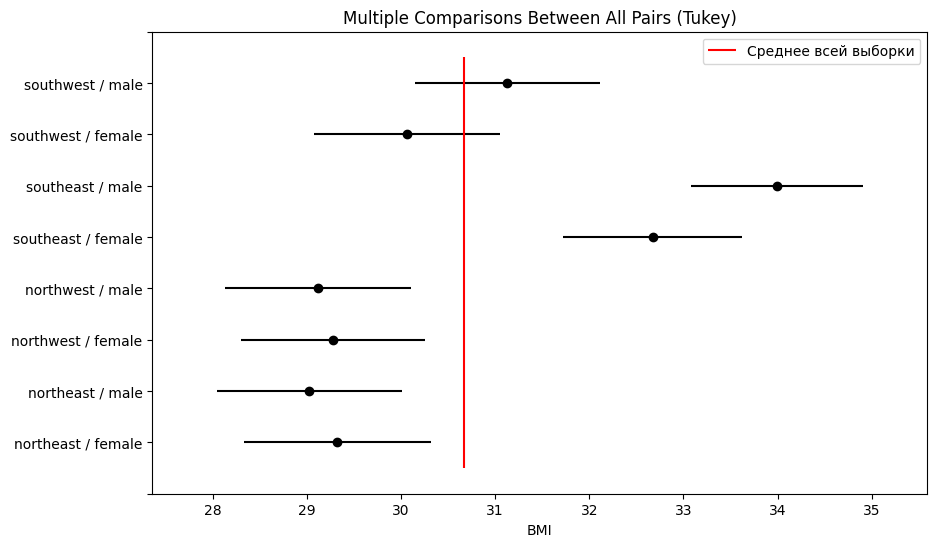

In [31]:
tukey.plot_simultaneous()
plt.vlines(x=data.bmi.mean(), color='red', ymin=-0.5, ymax=len(data.groupby('combination').groups)-0.5,
           label='Среднее всей выборки')
plt.xlabel('BMI')
plt.legend();